# Visualizing Feature Maps

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from keras.models import Model, Sequential, load_model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from keras.preprocessing import image
from matplotlib import pyplot
from numpy import expand_dims
from glob import glob

In [ ]:
vgg = VGG16(weights='imagenet', include_top=False)
vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

# 특정 layer를 지나간 이미지 1개 출력 

In [ ]:
def image_visualization(image_path):
  
  path = image_path
  image_list = os.listdir(path)

  for i in image_list:
    img = image.load_img(path + '/' + i, target_size= (150,150))
    plt.imshow(img)
    plt.axis('off')

    print(plt.show())

  # 이미지 시각화 

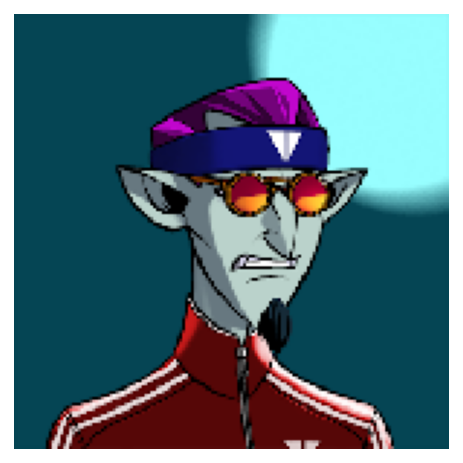

None


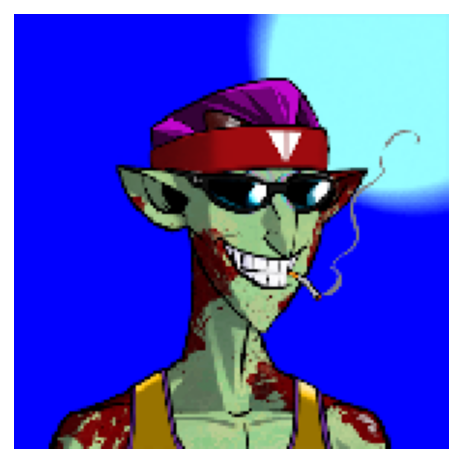

None


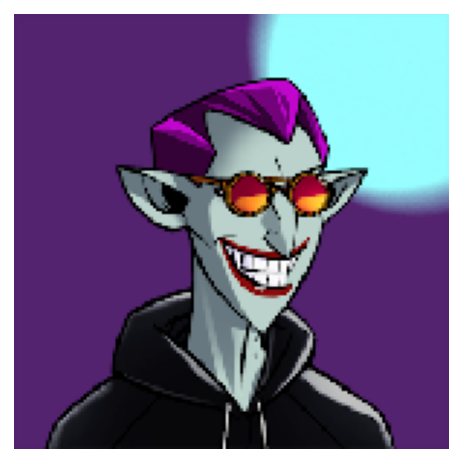

None


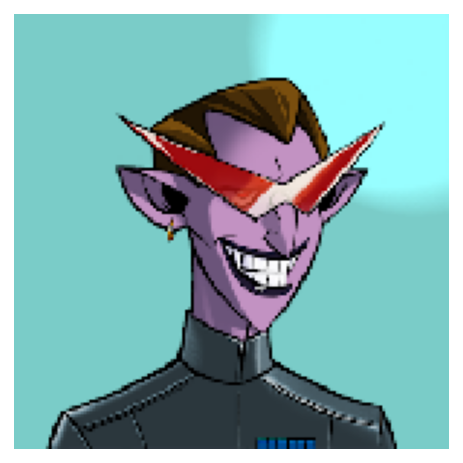

None


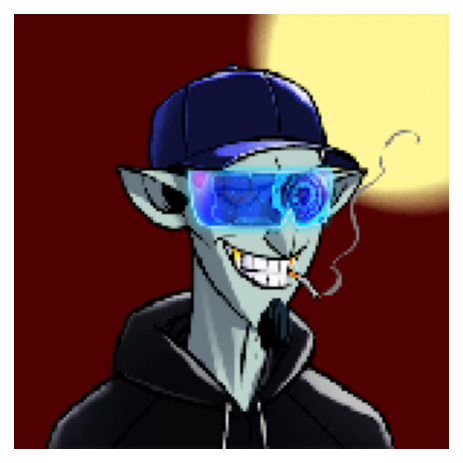

None


In [ ]:
image_visualization('/content/sneaky')

In [ ]:
def image_transform(image_path):
  
  path = image_path
  image_list = os.listdir(path)

  image_array = []
  for i in image_list:
    img = image.load_img(path + '/' + i, target_size = (150,150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    img_tensor /= 255.
    image_array.append(img_tensor)

  return image_array

In [ ]:
a = image_transform('/content/sneaky')
print(a)

[array([[[[0.01568628, 0.26666668, 0.3254902 ],
         [0.01568628, 0.26666668, 0.3254902 ],
         [0.01568628, 0.26666668, 0.3254902 ],
         ...,
         [0.58431375, 0.98039216, 0.9882353 ],
         [0.5803922 , 0.98039216, 0.9843137 ],
         [0.57254905, 0.972549  , 0.9764706 ]],

        [[0.01568628, 0.26666668, 0.3254902 ],
         [0.01960784, 0.27058825, 0.32941177],
         [0.01960784, 0.27058825, 0.32941177],
         ...,
         [0.5882353 , 0.99215686, 0.99607843],
         [0.5921569 , 0.99607843, 1.        ],
         [0.5803922 , 0.98039216, 0.9843137 ]],

        [[0.01568628, 0.26666668, 0.3254902 ],
         [0.01960784, 0.27058825, 0.32941177],
         [0.01960784, 0.27058825, 0.32941177],
         ...,
         [0.5921569 , 0.99607843, 1.        ],
         [0.5882353 , 0.99215686, 0.99607843],
         [0.5803922 , 0.98039216, 0.9843137 ]],

        ...,

        [[0.01568628, 0.26666668, 0.3254902 ],
         [0.01960784, 0.27058825, 0.32941177

In [ ]:
def visualization_one(arg, image_path, number):
  
  ''' 설명 
  arg : 특정 키워드(Conv or Pool)가 속한 Layer를 보고 싶을때 사용 
  image_path : 시각화하고자 하는 이미지의 path 
  number : 특정 키워드가 포함된 Layer의 깊이를 지칭(0부터 시작하며 숫자가 깊어질수록 추상적으로 변화)
  '''

  img_tensor = image_transform(image_path)

  layer_outputs = [layer.output for layer in vgg.layers if arg in layer.name]
  # arg에 속한 가진 layer 모두 도출 

  activation_model = Model(inputs=vgg.input, outputs=layer_outputs)
  # 모델 지정 

  intermediate_activations = []
  for i in img_tensor:
    intermediate_activations.append(activation_model.predict(i))
  # 해당 이미지의 결과 추출 

  first_layer_activation = []
  for j in intermediate_activations:
    first_layer_activation.append(j[number])
  # 숫자는 arg가 포함된 Layer를 뜻하며 숫자가 커질수록 깊은 Layer를 뜻하며 추상적으로 변함 

  for k in first_layer_activation:

    plt.imshow(k[0, :, :, 1], cmap='viridis')
  # cmap는 https://matplotlib.org/stable/tutorials/colors/colormaps.html 참고하여 다르게 지정 가능 
    plt.axis('off')

    print(plt.show())

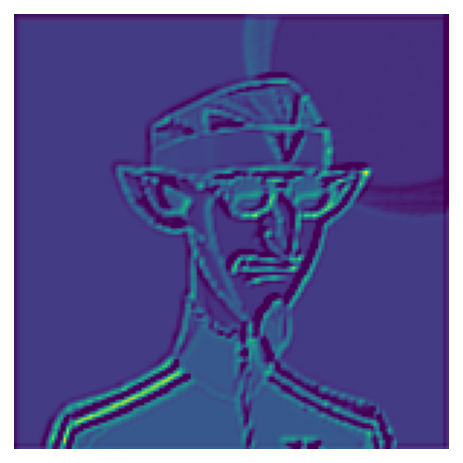

None


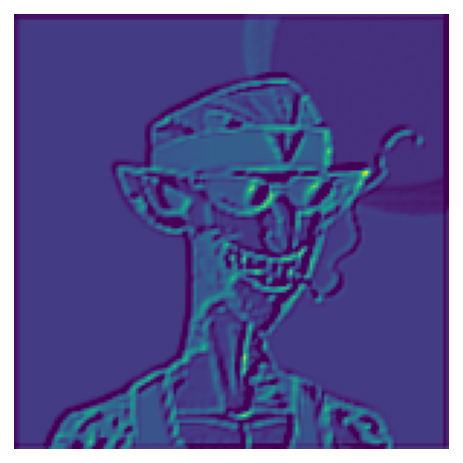

None


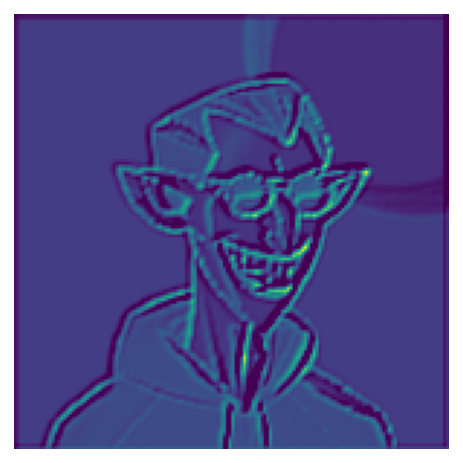

None


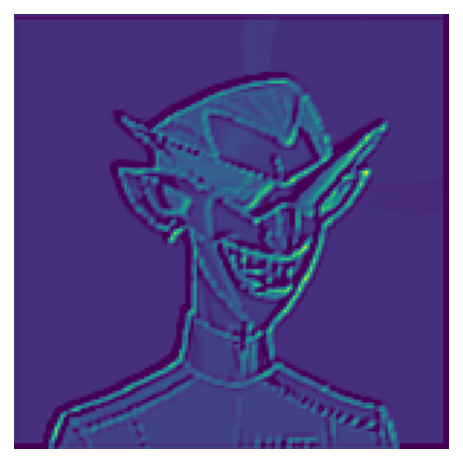

None


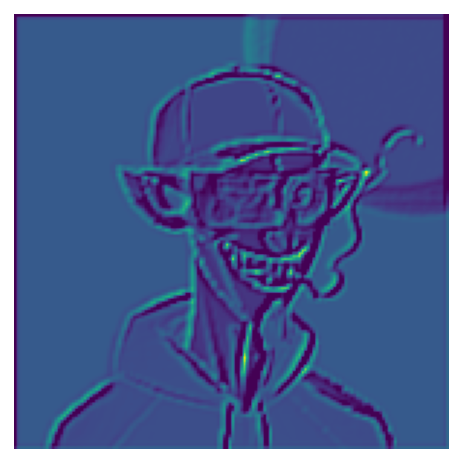

None


In [ ]:
visualization_one('conv2', '/content/sneaky', 0)

In [ ]:
def visualization(l_name, image_path, n_row, n_col):
  
  '''설명
  l_name : 시각화하고자 하는 Layer의 이름을 넣은 list 
  image_path : 시각화하고자 하는 이미지의 path 
  n_row, n_col : Layer마다 몇개의 이미지를 출력할지 결정할 수 있는 지표 
  '''

  img_tensor = image_transform(image_path)

  layer_names = l_name
  layer_outputs = [layer.output for layer in vgg.layers if layer.name in layer_names]
  activation_model = Model(inputs=vgg.input, outputs=layer_outputs)

  intermediate_activations = []
  for i in img_tensor:
    intermediate_activations.append(activation_model.predict(i))
  # 해당 이미지의 결과 추출 
  # intermediate_activations = activation_model.predict(img_tensor)

  images_per_row, max_images = n_row, n_col
  # 몇개의 image output을 출력할것인지 결정 

  for j in intermediate_activations:

    for layer_name, layer_activation in zip(layer_names, j):

        n_features = layer_activation.shape[-1]
        # layer output 개수 

        n_features = min(n_features, max_images)
        # output개수에서 지정한 개수만큼 output을 출력하기 위해 사용 

        size = layer_activation.shape[1]
        # 이미지 사이즈 추출 

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        # 0으로 구성된 matrix 생성 여기에 값을 넣을 것 

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                :, :,
                                                col * images_per_row + row]
                # layer마다 도출되는 feature map이 각자 다름 
                # layer마다 predict된 몇개의 값만 도출

                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                # 해당 값을 z값으로 바꿔줌 (x-mean) / std

                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                # channel_image의 값이 0보다 작으면 0으로 바꿔주고 255보다 크면 255로 바꿔줌 
                # 다시 이미지로 돌아가기 위해서 해당 작업 진행 
                display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image
                # 저장해놓은 0행렬에 해당 값들을 넣어줌 

        # 시각화 
        scale = 3. / size
        
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.axis('off')
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        # plt.colorbar()
    print(plt.show()) 

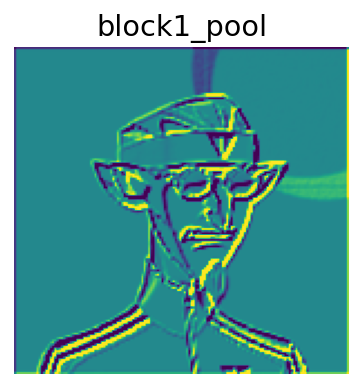

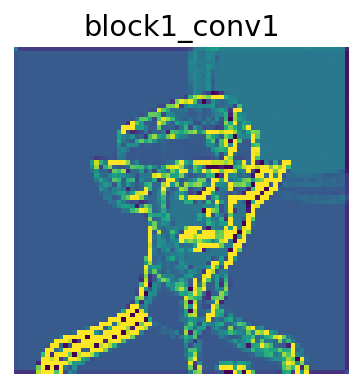

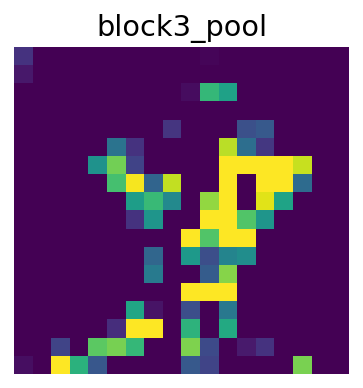

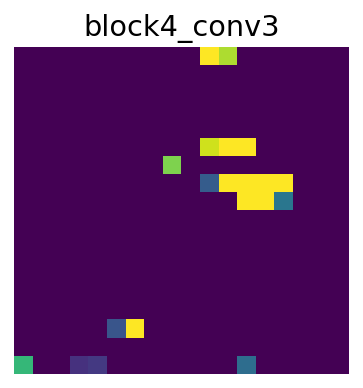

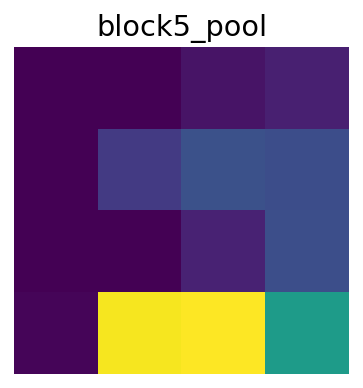

None


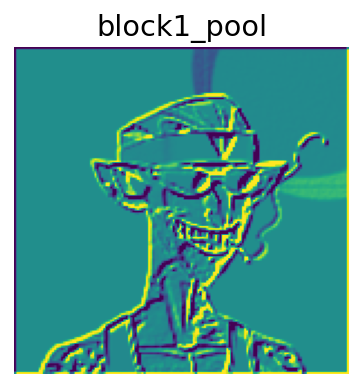

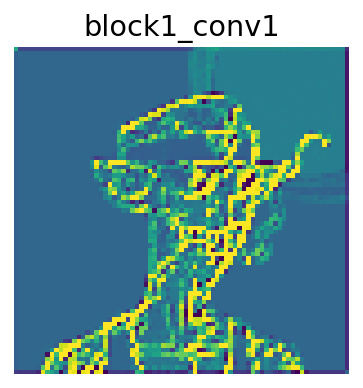

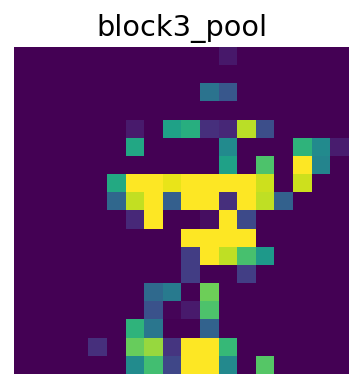

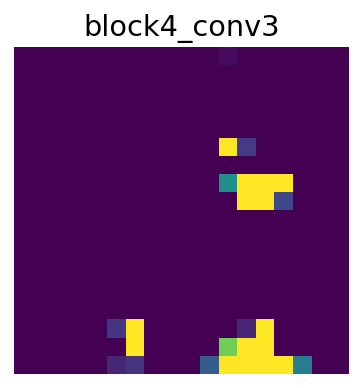

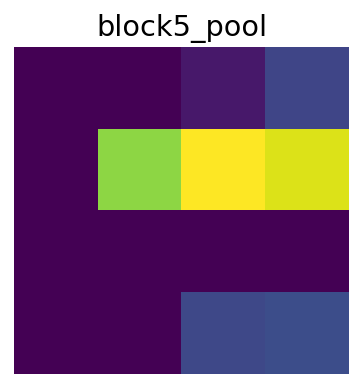

None


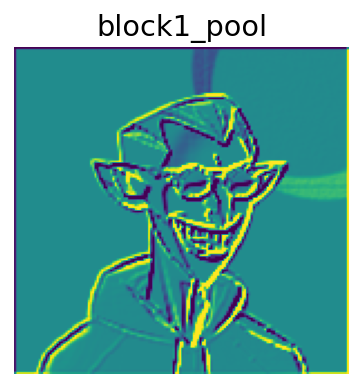

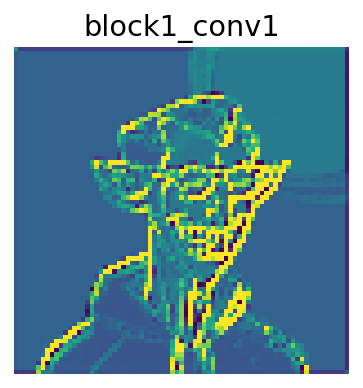

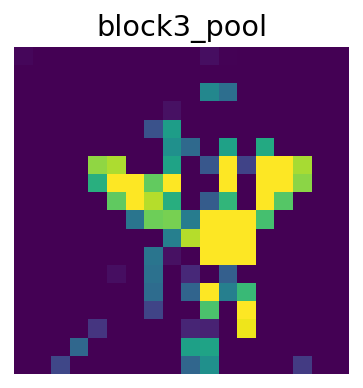

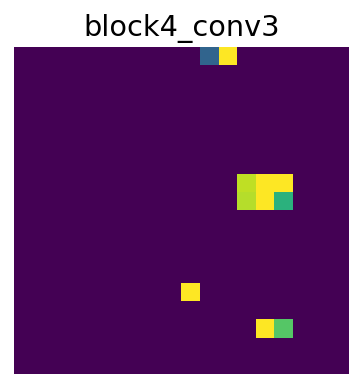

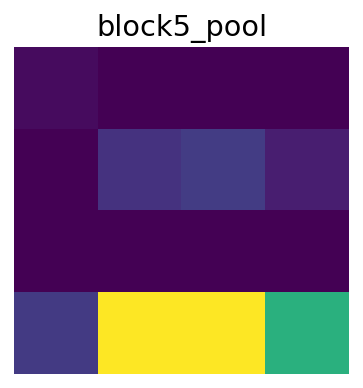

None


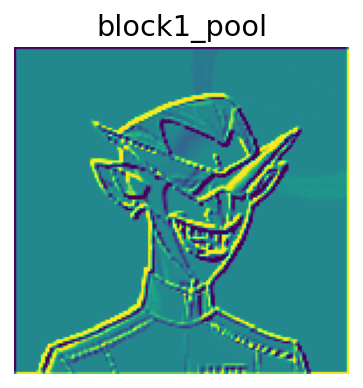

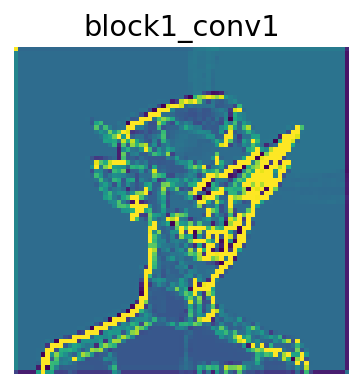

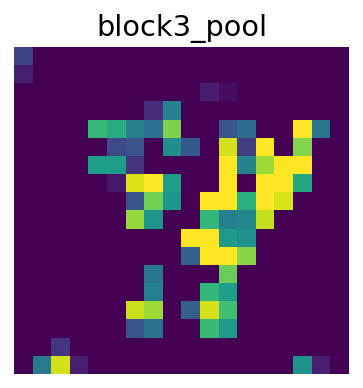

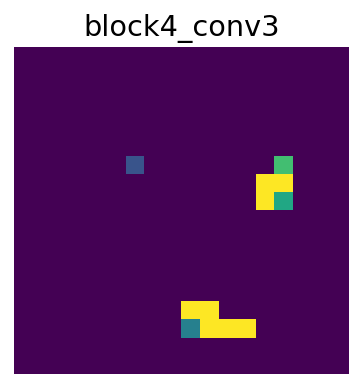

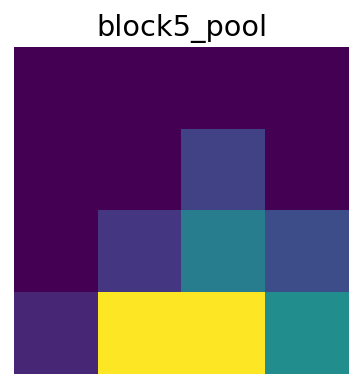

None


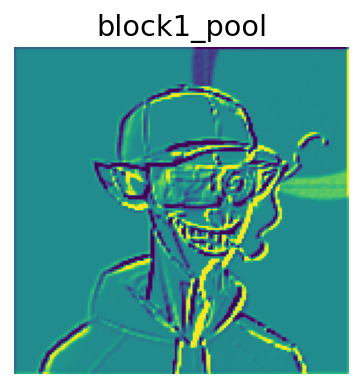

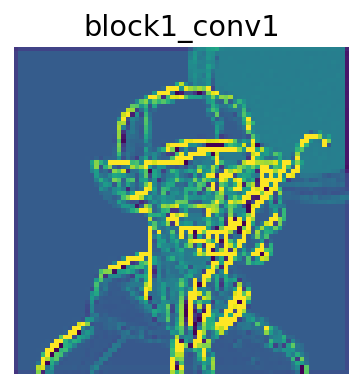

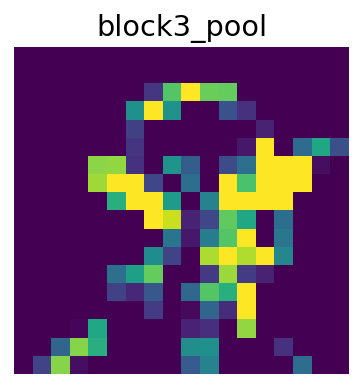

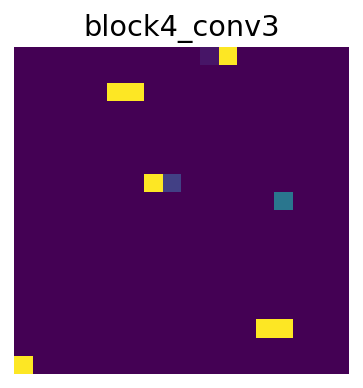

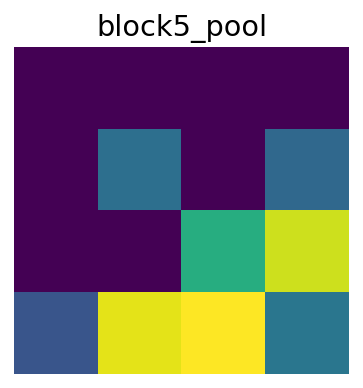

None


In [ ]:
layer = ['block1_pool', 'block1_conv1', 'block3_pool', 'block4_conv3', 'block5_pool']
visualization(layer, '/content/sneaky', 1, 1)